In [ ]:
import json

# from typing import Union

# import spacy
import pandas as pd
import matplotlib.pyplot as plt

# from dep_tree_tools import get_node_list
from tools.distractor_metrics import get_fact_scores
from tools.spacy_tools import process_text_list

In [ ]:
orig_dataset = pd.read_excel("../data_input/EgeEvalDataset.xlsx")

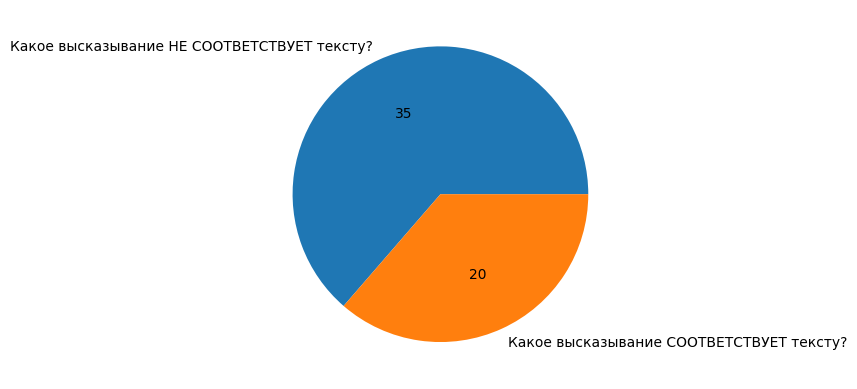

In [3]:
# https://stackoverflow.com/a/14171272
quest_counts = orig_dataset["question"].value_counts()
total = quest_counts.sum()
plt.figure()
plt.pie(quest_counts.values, labels=quest_counts.index, autopct=lambda p: '{:.0f}'.format(p * total / 100),)
plt.savefig("quest_counts.png", bbox_inches="tight")

In [ ]:
with open("../data_input/data_dict_processed.json", 'r', encoding="utf8") as inp:
    data_dict_processed = json.load(inp)

with open("../data_input/data_dict.json", 'r', encoding="utf8") as inp:
    data_dict = json.load(inp)

In [5]:
data_dict_proc = {key: [] for key in data_dict}

for key, val in data_dict.items():
    i = 0
    for item in val:
        distractor_set = []
        for distractor in item:
            distractor_set.append(data_dict_processed[key][i])
            i += 1
        data_dict_proc[key].append(distractor_set)

In [6]:
orig_dataset.head()

,index,reading_text,question,right_answer,distractors
0,0,На задворках нашего села стояло на сваях длин...,Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Полонез вызвал у автора желание заплакать и с...,"[' Рассказчик был сиротой.', ' В детстве эта м..."
1,1,"Мы ехали берегом Лены на юг, а зима догоняла ...",Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,"Подобравшись ближе к берегу, козы бросились к...","[' Собеседник рассказчика, Сокольский, сомнева..."
2,2,"Воспалённое состояние Поли, а главное, её сби...",Какое высказывание СООТВЕТСТВУЕТ тексту?,Автор письма хранит подарок девочки.,[' Родион встретил девочку перед наступлением....
3,3,"Все мы любили «классного», хотя нельзя сказат...",Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Ребята сразу невзлюбили своего классного руко...,[' Белый билет не давал учителю возможности уй...
4,4,В суровые военные годы во время бомбёжки моя ...,Какое высказывание НЕ СООТВЕТСТВУЕТ тексту?,Бабушка рассказчицы долгое время работала в т...,"[' Убежище, в котором укрывалась рассказчица, ..."


In [7]:
reading_texts_processed = process_text_list(orig_dataset["reading_text"].values.tolist())

Processing 55 items with GPU ...


100%|██████████| 55/55 [00:11<00:00,  4.95it/s]


In [8]:
distractor_fact_scores = []

for i, (key, val) in enumerate(data_dict_proc.items()):
    for j, (text, dset) in enumerate(zip(reading_texts_processed, val)):
        for k, d in enumerate(dset):
            distractor_fact_scores.append(
                {"source": key, **get_fact_scores(text, d), "reading_text": orig_dataset.iloc[j]["reading_text"], "distractor": data_dict[key][j][k]}
            )

distractor_fact_scores = pd.DataFrame(distractor_fact_scores)

In [9]:
distractor_fact_scores 

,source,vso_intersec_ind,vs_intersec_ind,vs_passivized_intersec_ind,vso_intersec,vs_intersec,vs_passivized_intersec,noun_intersec,propn_intersec,noun_intersec_ind,propn_intersec_ind,reading_text,distractor
0,BartDG,0,0,0,{},{},{},{родина},{},1,0,На задворках нашего села стояло на сваях длин...,Автор очень любил свою родину.
1,BartDG,0,0,0,{},{},{},"{скрипка, родина}",{},1,0,На задворках нашего села стояло на сваях длин...,Автор часто играл на скрипке на своей родине.
2,BartDG,0,0,0,{},{},{},"{война, жизнь}",{},1,0,На задворках нашего села стояло на сваях длин...,Соотечественник автора спас жизнь своему сыну ...
3,BartDG,0,0,0,{},{},{},{},{},0,0,"Мы ехали берегом Лены на юг, а зима догоняла ...",Оба козла были горными козлами.
4,BartDG,0,0,0,{},{},{},{коза},{},1,0,"Мы ехали берегом Лены на юг, а зима догоняла ...","Старая коза, маленькая, была готова снова прыг..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,true_distractors,0,0,0,{},{},{},"{муж, медсёстры, барокамера}",{},1,0,…Мы недавно поженились. Ещё ходили по улице и...,Героине повествования медсёстры не разрешали в...
1557,true_distractors,0,0,0,{},{},{},{муж},{},1,0,…Мы недавно поженились. Ещё ходили по улице и...,Муж выздоровел благодаря заботам жены.
1558,true_distractors,0,0,0,{},{},{},{западня},{пётр},1,1,"Прутский поход Петра Первого, предпринятый в ...","Пётр решил, выбравшись из западни, двигаться в..."
1559,true_distractors,0,0,0,{},{},{},"{войском, турок, король, поражение}","{пётр, полтава}",1,1,"Прутский поход Петра Первого, предпринятый в ...",Шведский король мечтал о реванше за поражение ...


In [10]:
[col for col in distractor_fact_scores.columns if col.endswith("len")]

[]

In [11]:
distractor_fact_scores.groupby("source")[[col for col in distractor_fact_scores.columns if col.endswith("ind")]].mean()

,vso_intersec_ind,vs_intersec_ind,vs_passivized_intersec_ind,noun_intersec_ind,propn_intersec_ind
source,,,,,
BartDG,0.024096,0.060241,0.006024,0.831325,0.228916
BartDG_ANPM,0.011976,0.041916,0.000000,0.862275,0.143713
BartDG_PM,0.000000,0.011976,0.005988,0.808383,0.137725
ChatGPT4o,0.006024,0.042169,0.000000,0.873494,0.331325
Deepseek,0.006061,0.048485,0.000000,0.957576,0.345455
MuSeRC_GPT3,0.012579,0.018868,0.000000,0.389937,0.069182
MuSeRC_T5,0.056180,0.067416,0.000000,0.662921,0.292135
RuRace_GPT3,0.019231,0.038462,0.019231,0.775641,0.256410
RuRace_T5,0.043750,0.100000,0.000000,0.900000,0.337500


In [ ]:
distractor_fact_scores.to_excel("../data_output_table/distractor_metrics/DistractorFactScores1.xlsx")